# Single A2C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from Utils import single_A2C_training as A2C_train
from Utils import A3C_training
from Utils import test_env, utils, plot

from AC_modules.Constructor import *
from AC_modules.Networks import *
from AC_modules.AdvantageActorCritic import SharedAC, IndependentAC

from importlib import reload

In [2]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [6,7]
MAX_STEPS = 100

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=False, return_coord=True, R0=0)

In [3]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = True

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  True
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [4]:
# see if everything works before starting the real training cycle
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap = A2C_train.play_episode(agent, env, max_steps=MAX_STEPS)

print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

agent.compute_ac_loss(rewards, log_probs, distributions, states, done, bootstrap)

rewards:  (100,)
log_probs:  100
distributions:  100
states:  (101, 5)
done:  (100,)
bootstrap:  (100,)


(tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward>),
 tensor(-0.0919, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(-0.3460, device='cuda:0', grad_fn=<MeanBackward0>))

### Training shared architecture

In [11]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = True

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  True
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [12]:
%%time
results = A2C_train.train_sandbox(agent, game_params, lr, n_episodes = 10000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True)

Episode 10 - reward: 0.50 - steps to solve: 71.90
Episode 20 - reward: 0.40 - steps to solve: 70.00
Episode 30 - reward: 0.40 - steps to solve: 71.30
Episode 40 - reward: 0.20 - steps to solve: 83.40
Episode 50 - reward: 0.20 - steps to solve: 86.70
Episode 60 - reward: 0.40 - steps to solve: 72.30
Episode 70 - reward: 0.40 - steps to solve: 80.70
Episode 80 - reward: 0.20 - steps to solve: 83.80
Episode 90 - reward: 0.20 - steps to solve: 86.90
Episode 100 - reward: 0.60 - steps to solve: 65.40
Episode 110 - reward: 0.50 - steps to solve: 79.70
Episode 120 - reward: 0.10 - steps to solve: 91.90
Episode 130 - reward: 0.30 - steps to solve: 82.80
Episode 140 - reward: 0.20 - steps to solve: 89.40
Episode 150 - reward: 0.40 - steps to solve: 75.70
Episode 160 - reward: 0.10 - steps to solve: 90.30
Episode 170 - reward: 0.50 - steps to solve: 80.00
Episode 180 - reward: 0.50 - steps to solve: 76.80
Episode 190 - reward: 0.10 - steps to solve: 90.30
Episode 200 - reward: 0.00 - steps to so

Episode 1610 - reward: 0.40 - steps to solve: 70.00
Episode 1620 - reward: 0.60 - steps to solve: 74.90
Episode 1630 - reward: 0.60 - steps to solve: 56.90
Episode 1640 - reward: 0.50 - steps to solve: 65.60
Episode 1650 - reward: 0.50 - steps to solve: 73.80
Episode 1660 - reward: 0.60 - steps to solve: 64.30
Episode 1670 - reward: 0.40 - steps to solve: 75.60
Episode 1680 - reward: 0.30 - steps to solve: 82.60
Episode 1690 - reward: 0.50 - steps to solve: 62.40
Episode 1700 - reward: 0.40 - steps to solve: 82.00
Episode 1710 - reward: 0.00 - steps to solve: 100.00
Episode 1720 - reward: 0.50 - steps to solve: 73.10
Episode 1730 - reward: 0.20 - steps to solve: 88.40
Episode 1740 - reward: 0.30 - steps to solve: 85.40
Episode 1750 - reward: 0.30 - steps to solve: 78.90
Episode 1760 - reward: 0.50 - steps to solve: 71.60
Episode 1770 - reward: 0.40 - steps to solve: 84.90
Episode 1780 - reward: 0.20 - steps to solve: 85.60
Episode 1790 - reward: 0.40 - steps to solve: 82.80
Episode 180

Episode 3190 - reward: 0.30 - steps to solve: 90.70
Episode 3200 - reward: 0.40 - steps to solve: 74.90
Episode 3210 - reward: 0.30 - steps to solve: 75.40
Episode 3220 - reward: 0.10 - steps to solve: 97.40
Episode 3230 - reward: 0.60 - steps to solve: 72.40
Episode 3240 - reward: 0.30 - steps to solve: 74.40
Episode 3250 - reward: 0.20 - steps to solve: 94.50
Episode 3260 - reward: 0.40 - steps to solve: 80.50
Episode 3270 - reward: 0.40 - steps to solve: 80.60
Episode 3280 - reward: 0.20 - steps to solve: 89.10
Episode 3290 - reward: 0.30 - steps to solve: 77.10
Episode 3300 - reward: 0.30 - steps to solve: 84.80
Episode 3310 - reward: 0.50 - steps to solve: 57.30
Episode 3320 - reward: 0.40 - steps to solve: 77.00
Episode 3330 - reward: 0.10 - steps to solve: 92.10
Episode 3340 - reward: 0.10 - steps to solve: 91.50
Episode 3350 - reward: 0.20 - steps to solve: 86.50
Episode 3360 - reward: 0.40 - steps to solve: 80.80
Episode 3370 - reward: 0.50 - steps to solve: 78.80
Episode 3380

Episode 4770 - reward: 0.40 - steps to solve: 79.20
Episode 4780 - reward: 0.60 - steps to solve: 59.60
Episode 4790 - reward: 0.40 - steps to solve: 69.50
Episode 4800 - reward: 0.40 - steps to solve: 78.40
Episode 4810 - reward: 0.40 - steps to solve: 80.90
Episode 4820 - reward: 0.30 - steps to solve: 83.60
Episode 4830 - reward: 0.40 - steps to solve: 87.30
Episode 4840 - reward: 0.40 - steps to solve: 65.90
Episode 4850 - reward: 0.50 - steps to solve: 69.10
Episode 4860 - reward: 0.50 - steps to solve: 62.30
Episode 4870 - reward: 0.30 - steps to solve: 84.30
Episode 4880 - reward: 0.50 - steps to solve: 62.60
Episode 4890 - reward: 0.30 - steps to solve: 74.20
Episode 4900 - reward: 0.30 - steps to solve: 80.20
Episode 4910 - reward: 0.50 - steps to solve: 67.50
Episode 4920 - reward: 0.40 - steps to solve: 67.50
Episode 4930 - reward: 0.20 - steps to solve: 88.90
Episode 4940 - reward: 0.40 - steps to solve: 78.80
Episode 4950 - reward: 0.10 - steps to solve: 93.20
Episode 4960

Episode 6350 - reward: 0.50 - steps to solve: 76.30
Episode 6360 - reward: 0.30 - steps to solve: 83.00
Episode 6370 - reward: 0.40 - steps to solve: 88.30
Episode 6380 - reward: 0.30 - steps to solve: 82.60
Episode 6390 - reward: 0.40 - steps to solve: 74.90
Episode 6400 - reward: 0.60 - steps to solve: 61.20
Episode 6410 - reward: 0.30 - steps to solve: 89.00
Episode 6420 - reward: 0.70 - steps to solve: 65.30
Episode 6430 - reward: 0.50 - steps to solve: 72.30
Episode 6440 - reward: 0.70 - steps to solve: 58.90
Episode 6450 - reward: 0.50 - steps to solve: 77.70
Episode 6460 - reward: 0.60 - steps to solve: 65.10
Episode 6470 - reward: 0.60 - steps to solve: 70.40
Episode 6480 - reward: 0.30 - steps to solve: 85.30
Episode 6490 - reward: 0.30 - steps to solve: 86.30
Episode 6500 - reward: 0.40 - steps to solve: 82.10
Episode 6510 - reward: 0.40 - steps to solve: 78.90
Episode 6520 - reward: 0.60 - steps to solve: 70.50
Episode 6530 - reward: 0.60 - steps to solve: 71.00
Episode 6540

Episode 7930 - reward: 1.00 - steps to solve: 42.00
Episode 7940 - reward: 0.70 - steps to solve: 67.10
Episode 7950 - reward: 0.50 - steps to solve: 63.70
Episode 7960 - reward: 0.80 - steps to solve: 57.00
Episode 7970 - reward: 1.00 - steps to solve: 41.30
Episode 7980 - reward: 0.60 - steps to solve: 57.50
Episode 7990 - reward: 0.90 - steps to solve: 36.00
Episode 8000 - reward: 0.80 - steps to solve: 46.40
Episode 8010 - reward: 1.00 - steps to solve: 53.20
Episode 8020 - reward: 1.00 - steps to solve: 36.40
Episode 8030 - reward: 0.50 - steps to solve: 68.80
Episode 8040 - reward: 0.80 - steps to solve: 59.00
Episode 8050 - reward: 0.70 - steps to solve: 61.50
Episode 8060 - reward: 0.80 - steps to solve: 45.60
Episode 8070 - reward: 0.80 - steps to solve: 40.90
Episode 8080 - reward: 0.70 - steps to solve: 61.50
Episode 8090 - reward: 0.60 - steps to solve: 58.90
Episode 8100 - reward: 0.90 - steps to solve: 54.50
Episode 8110 - reward: 0.70 - steps to solve: 52.20
Episode 8120

Episode 9510 - reward: 0.80 - steps to solve: 52.20
Episode 9520 - reward: 0.90 - steps to solve: 47.40
Episode 9530 - reward: 0.90 - steps to solve: 36.00
Episode 9540 - reward: 1.00 - steps to solve: 30.30
Episode 9550 - reward: 1.00 - steps to solve: 38.30
Episode 9560 - reward: 0.80 - steps to solve: 49.70
Episode 9570 - reward: 1.00 - steps to solve: 35.20
Episode 9580 - reward: 0.90 - steps to solve: 39.50
Episode 9590 - reward: 1.00 - steps to solve: 39.10
Episode 9600 - reward: 0.90 - steps to solve: 43.20
Episode 9610 - reward: 0.90 - steps to solve: 59.50
Episode 9620 - reward: 0.80 - steps to solve: 57.70
Episode 9630 - reward: 0.80 - steps to solve: 52.10
Episode 9640 - reward: 0.90 - steps to solve: 35.60
Episode 9650 - reward: 0.80 - steps to solve: 42.70
Episode 9660 - reward: 0.80 - steps to solve: 35.80
Episode 9670 - reward: 1.00 - steps to solve: 47.10
Episode 9680 - reward: 0.80 - steps to solve: 50.90
Episode 9690 - reward: 0.80 - steps to solve: 43.60
Episode 9700

In [13]:
shared_results = results

In [14]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses, steps_to_solve = shared_results

In [15]:
save = True
keywords = [ 'coord','10by10', 'shared' ,str(len(score))+"-episodes",str(MAX_STEPS)+"-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_coord_10by10_shared_10000-episodes_100-steps_YVXU


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SharedAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SharedActorCritic. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CoordinateNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + 

Average time for playing one episode: 0.03 s
Average time for updating the agent: 0.03 s
Asymptotic score: 0.848 +/- 0.359


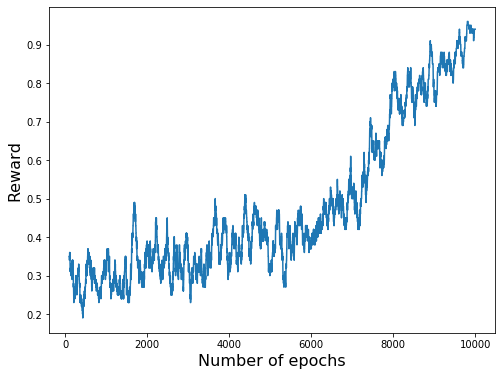

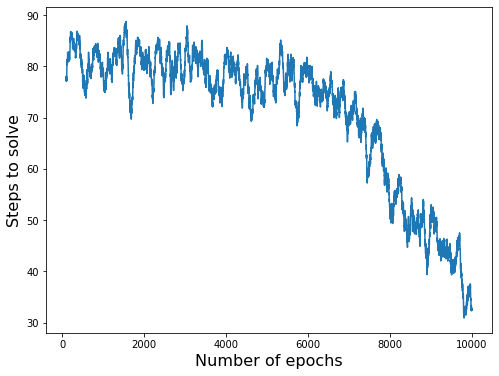

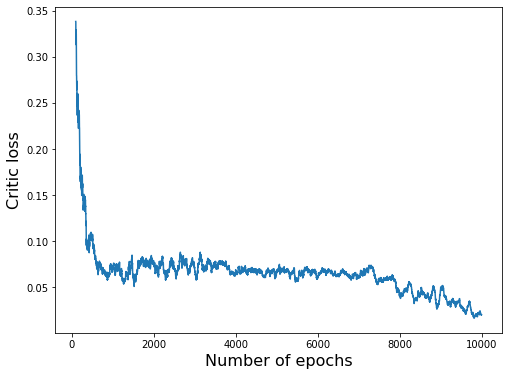

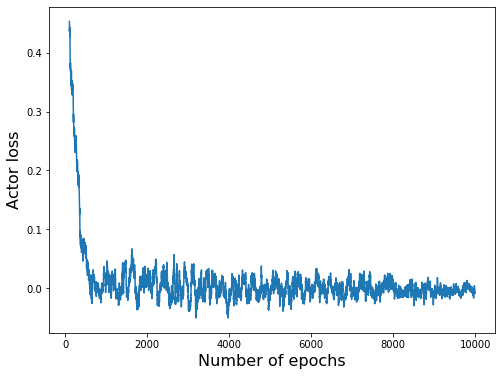

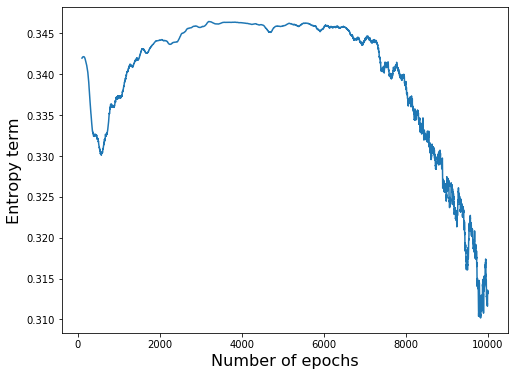

In [16]:
plot.plot_results(shared_results, moving_average=True)

### Training independent architecture

In [17]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, twin=False, 
           H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = False

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'twin': False, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [4]:
%%time
independent_results = A2C_train.train_sandbox(agent, game_params, lr, n_episodes = 5000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True)

Episode 10 - reward: 0.30 - steps to solve: 85.80
Episode 20 - reward: 0.40 - steps to solve: 87.30
Episode 30 - reward: 0.20 - steps to solve: 88.70
Episode 40 - reward: 0.30 - steps to solve: 82.10
Episode 50 - reward: 0.30 - steps to solve: 86.90
Episode 60 - reward: 0.30 - steps to solve: 76.30
Episode 70 - reward: 0.40 - steps to solve: 82.60
Episode 80 - reward: 0.40 - steps to solve: 84.80
Episode 90 - reward: 0.30 - steps to solve: 85.50
Episode 100 - reward: 0.40 - steps to solve: 83.60
Episode 110 - reward: 0.40 - steps to solve: 77.80
Episode 120 - reward: 0.40 - steps to solve: 70.50
Episode 130 - reward: 0.20 - steps to solve: 89.00
Episode 140 - reward: 0.10 - steps to solve: 90.50
Episode 150 - reward: 0.60 - steps to solve: 67.90
Episode 160 - reward: 0.70 - steps to solve: 65.40
Episode 170 - reward: 0.30 - steps to solve: 81.40
Episode 180 - reward: 0.40 - steps to solve: 76.60
Episode 190 - reward: 0.50 - steps to solve: 69.80
Episode 200 - reward: 0.40 - steps to so

Episode 1610 - reward: 0.30 - steps to solve: 85.90
Episode 1620 - reward: 0.80 - steps to solve: 41.50
Episode 1630 - reward: 0.80 - steps to solve: 58.90
Episode 1640 - reward: 0.90 - steps to solve: 43.20
Episode 1650 - reward: 0.70 - steps to solve: 75.30
Episode 1660 - reward: 0.70 - steps to solve: 52.10
Episode 1670 - reward: 0.60 - steps to solve: 63.00
Episode 1680 - reward: 0.80 - steps to solve: 63.10
Episode 1690 - reward: 0.70 - steps to solve: 57.50
Episode 1700 - reward: 0.70 - steps to solve: 55.20
Episode 1710 - reward: 0.90 - steps to solve: 47.20
Episode 1720 - reward: 1.00 - steps to solve: 46.80
Episode 1730 - reward: 0.80 - steps to solve: 67.90
Episode 1740 - reward: 0.80 - steps to solve: 52.50
Episode 1750 - reward: 0.80 - steps to solve: 41.90
Episode 1760 - reward: 0.70 - steps to solve: 55.30
Episode 1770 - reward: 0.90 - steps to solve: 56.60
Episode 1780 - reward: 0.90 - steps to solve: 53.00
Episode 1790 - reward: 1.00 - steps to solve: 40.40
Episode 1800

Episode 3190 - reward: 1.00 - steps to solve: 16.60
Episode 3200 - reward: 1.00 - steps to solve: 14.60
Episode 3210 - reward: 1.00 - steps to solve: 14.20
Episode 3220 - reward: 1.00 - steps to solve: 13.50
Episode 3230 - reward: 1.00 - steps to solve: 13.10
Episode 3240 - reward: 1.00 - steps to solve: 16.10
Episode 3250 - reward: 1.00 - steps to solve: 17.80
Episode 3260 - reward: 1.00 - steps to solve: 10.10
Episode 3270 - reward: 1.00 - steps to solve: 22.00
Episode 3280 - reward: 1.00 - steps to solve: 13.30
Episode 3290 - reward: 1.00 - steps to solve: 11.70
Episode 3300 - reward: 1.00 - steps to solve: 15.30
Episode 3310 - reward: 1.00 - steps to solve: 13.30
Episode 3320 - reward: 1.00 - steps to solve: 16.40
Episode 3330 - reward: 1.00 - steps to solve: 13.90
Episode 3340 - reward: 1.00 - steps to solve: 14.20
Episode 3350 - reward: 1.00 - steps to solve: 8.70
Episode 3360 - reward: 1.00 - steps to solve: 14.80
Episode 3370 - reward: 1.00 - steps to solve: 16.30
Episode 3380 

Episode 4800 - reward: 1.00 - steps to solve: 6.80
Episode 4810 - reward: 1.00 - steps to solve: 6.50
Episode 4820 - reward: 1.00 - steps to solve: 9.10
Episode 4830 - reward: 1.00 - steps to solve: 8.50
Episode 4840 - reward: 1.00 - steps to solve: 6.70
Episode 4850 - reward: 1.00 - steps to solve: 8.80
Episode 4860 - reward: 1.00 - steps to solve: 9.60
Episode 4870 - reward: 1.00 - steps to solve: 8.10
Episode 4880 - reward: 1.00 - steps to solve: 11.20
Episode 4890 - reward: 1.00 - steps to solve: 7.60
Episode 4900 - reward: 1.00 - steps to solve: 7.30
Episode 4910 - reward: 1.00 - steps to solve: 8.80
Episode 4920 - reward: 1.00 - steps to solve: 7.60
Episode 4930 - reward: 1.00 - steps to solve: 8.00
Episode 4940 - reward: 1.00 - steps to solve: 8.70
Episode 4950 - reward: 1.00 - steps to solve: 8.00
Episode 4960 - reward: 1.00 - steps to solve: 8.30
Episode 4970 - reward: 1.00 - steps to solve: 8.50
Episode 4980 - reward: 1.00 - steps to solve: 9.30
Episode 4990 - reward: 1.00 - 

In [5]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses, steps_to_solve = independent_results

In [6]:
save = True
keywords = [ 'coord','10by10', 'independent' ,str(len(score))+"-episodes",str(MAX_STEPS)+"-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_coord_10by10_independent_5000-episodes_100-steps_QJAG


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type IndependentAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Actor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won'

Average time for playing one episode: 0.02 s
Average time for updating the agent: 0.02 s
Asymptotic score: 1.000 +/- 0.000


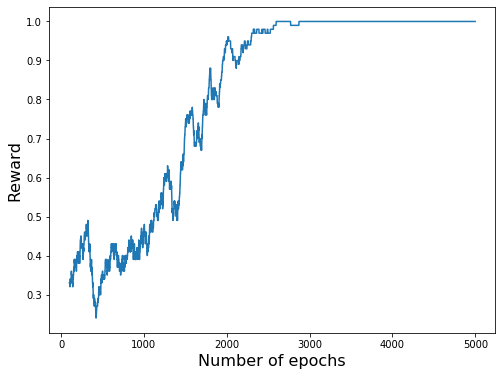

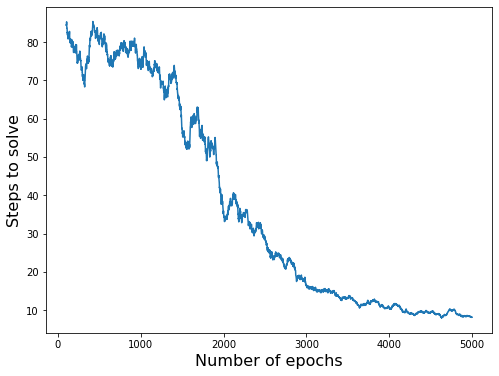

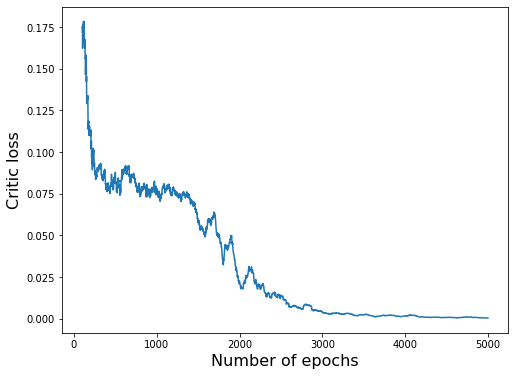

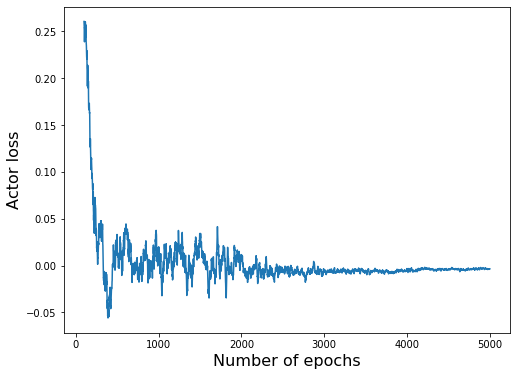

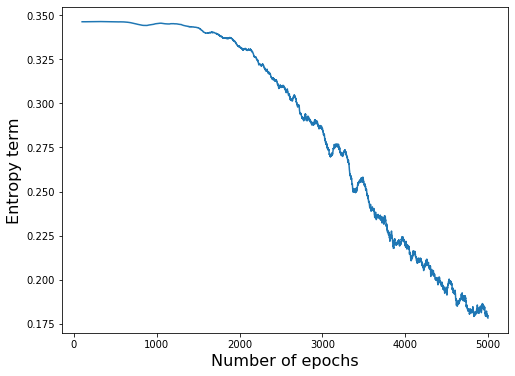

In [7]:
plot.plot_results(independent_results, moving_average=True)

Independent architecture is far superior to the shared one.

# A3C 
### Independent architecture 

In [2]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [6,7]
MAX_STEPS = 100

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=False, return_coord=True, R0=0)

In [3]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, twin=False, 
           H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = False

HPs['device'] = 'cpu'    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)

Using device cpu
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'twin': False, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cpu'}


In [4]:
%%time
results = A3C_training.train_sandbox(agent_constructor, lr, game_params, n_training_threads=11, n_episodes=500,
                  max_steps=MAX_STEPS, return_agent=True, random_init=True)

Test process started
max_tests:  539
optim_steps:  0
test counter:  1
Process 1 started
optim_steps:  0
test counter:  1
Process 2 started
optim_steps:  0
Process 3 started
Process 4 started
test counter:  1
Process 5 started
optim_steps:  0
Process 6 started
Process 7 started
test counter:  1
Process 8 started
optim_steps:  1
test counter:  1
Process 10 started
Process 9 started
optim_steps:  2
Process 11 started
test counter:  1
optim_steps:  2
test counter:  1
optim_steps:  8
test counter:  1
Test 2 - reward 0.00 - steps to solve 100.00
optim_steps:  19
test counter:  2
optim_steps:  23
test counter:  2
Test 3 - reward 0.50 - steps to solve 51.00
optim_steps:  25
test counter:  3
optim_steps:  26
test counter:  3
optim_steps:  29
test counter:  3
optim_steps:  33
test counter:  3
All processes started
Test 4 - reward 0.33 - steps to solve 67.33
optim_steps:  41
test counter:  4
Test 5 - reward 0.25 - steps to solve 75.50
optim_steps:  50
test counter:  5
Test 6 - reward 0.40 - steps

Test 78 - reward 0.30 - steps to solve 80.70
optim_steps:  780
test counter:  78
optim_steps:  783
test counter:  78
Test 79 - reward 0.30 - steps to solve 80.70
optim_steps:  792
test counter:  79
optim_steps:  799
test counter:  80
optim_steps:  803
test counter:  80
Test 81 - reward 0.30 - steps to solve 78.00
optim_steps:  807
test counter:  81
optim_steps:  810
test counter:  81
Test 82 - reward 0.30 - steps to solve 78.00
optim_steps:  818
test counter:  82
Test 83 - reward 0.30 - steps to solve 78.00
optim_steps:  826
test counter:  83
optim_steps:  831
test counter:  83
Test 84 - reward 0.30 - steps to solve 78.40
optim_steps:  834
test counter:  84
optim_steps:  839
test counter:  84
optim_steps:  840
test counter:  84
Test 85 - reward 0.30 - steps to solve 78.40
optim_steps:  848
test counter:  85
optim_steps:  852
test counter:  85
Test 86 - reward 0.30 - steps to solve 78.40
optim_steps:  862
test counter:  86
Test 87 - reward 0.20 - steps to solve 84.00
optim_steps:  873
t

optim_steps:  1579
test counter:  158
optim_steps:  1581
test counter:  158
Test 159 - reward 0.70 - steps to solve 61.00
optim_steps:  1584
test counter:  159
optim_steps:  1589
test counter:  159
optim_steps:  1591
test counter:  159
optim_steps:  1598
test counter:  160
Test 161 - reward 0.50 - steps to solve 69.00
optim_steps:  1607
test counter:  161
optim_steps:  1612
test counter:  161
Test 162 - reward 0.50 - steps to solve 71.30
optim_steps:  1619
test counter:  162
Test 163 - reward 0.50 - steps to solve 71.30
optim_steps:  1632
test counter:  163
Test 164 - reward 0.50 - steps to solve 71.30
optim_steps:  1641
test counter:  164
Test 165 - reward 0.50 - steps to solve 72.70
optim_steps:  1645
test counter:  165
optim_steps:  1649
test counter:  165
optim_steps:  1654
test counter:  165
Test 166 - reward 0.40 - steps to solve 75.40
optim_steps:  1662
test counter:  166
Test 167 - reward 0.50 - steps to solve 66.30
optim_steps:  1665
test counter:  167
optim_steps:  1668
test 

test counter:  239
optim_steps:  2397
test counter:  240
optim_steps:  2404
test counter:  240
Test 241 - reward 1.00 - steps to solve 57.00
optim_steps:  2415
test counter:  241
Test 242 - reward 1.00 - steps to solve 56.20
optim_steps:  2423
test counter:  242
Test 243 - reward 1.00 - steps to solve 56.90
optim_steps:  2433
test counter:  243
Test 244 - reward 1.00 - steps to solve 57.60
optim_steps:  2439
test counter:  244
Test 245 - reward 1.00 - steps to solve 59.50
optim_steps:  2448
test counter:  245
Test 246 - reward 0.90 - steps to solve 68.10
optim_steps:  2464
test counter:  246
Test 247 - reward 0.90 - steps to solve 60.00
optim_steps:  2467
test counter:  247
optim_steps:  2471
test counter:  247
Test 248 - reward 0.90 - steps to solve 55.30
optim_steps:  2475
test counter:  248
optim_steps:  2480
test counter:  248
Test 249 - reward 0.90 - steps to solve 58.00
optim_steps:  2492
test counter:  249
optim_steps:  2497
test counter:  250
optim_steps:  2504
test counter:  2

optim_steps:  3369
test counter:  336
Test 337 - reward 1.00 - steps to solve 29.40
optim_steps:  3379
test counter:  337
Test 338 - reward 1.00 - steps to solve 29.10
optim_steps:  3387
test counter:  338
Test 339 - reward 1.00 - steps to solve 25.90
optim_steps:  3398
test counter:  339
optim_steps:  3408
test counter:  340
Test 341 - reward 1.00 - steps to solve 22.50
optim_steps:  3423
test counter:  341
Test 342 - reward 1.00 - steps to solve 22.40
optim_steps:  3433
test counter:  342
Test 343 - reward 1.00 - steps to solve 22.50
optim_steps:  3440
test counter:  343
Test 344 - reward 1.00 - steps to solve 19.90
optim_steps:  3448
test counter:  344
Test 345 - reward 1.00 - steps to solve 18.20
optim_steps:  3456
test counter:  345
Test 346 - reward 1.00 - steps to solve 17.60
optim_steps:  3461
test counter:  346
Test 347 - reward 1.00 - steps to solve 14.60
optim_steps:  3470
test counter:  347
Test 348 - reward 0.90 - steps to solve 23.30
optim_steps:  3496
test counter:  348


test counter:  439
optim_steps:  4607
test counter:  440
Test 441 - reward 1.00 - steps to solve 12.60
optim_steps:  4615
test counter:  441
Test 442 - reward 1.00 - steps to solve 13.90
optim_steps:  4633
test counter:  442
Test 443 - reward 1.00 - steps to solve 13.30
optim_steps:  4647
test counter:  443
Test 444 - reward 1.00 - steps to solve 12.30
optim_steps:  4661
test counter:  444
Test 445 - reward 1.00 - steps to solve 12.10
optim_steps:  4674
test counter:  445
Test 446 - reward 1.00 - steps to solve 12.20
optim_steps:  4688
test counter:  446
Test 447 - reward 1.00 - steps to solve 10.30
optim_steps:  4702
test counter:  447
Test 448 - reward 1.00 - steps to solve 10.50
optim_steps:  4717
test counter:  448
Test 449 - reward 1.00 - steps to solve 11.30
optim_steps:  4731
test counter:  449
optim_steps:  4741
test counter:  450
Test 451 - reward 1.00 - steps to solve 11.30
optim_steps:  4754
test counter:  451
Test 452 - reward 1.00 - steps to solve 10.90
optim_steps:  4771


optim_steps:  5463
test counter:  538
Test 539 - reward 1.00 - steps to solve 9.90
Putting results in queue
performance (put) 
Training process 6 reached maximum episode.
steps_to_solve (put)
critic_losses (put)
actor_losses (put) 
entropies (put)
performance (get)
steps_to_solve (get)
critic_losses (get)
actor_losses (get)
entropies (get)
All processes finished
CPU times: user 795 ms, sys: 413 ms, total: 1.21 s
Wall time: 16 s


In [5]:
score, global_model, losses, steps_to_solve = results

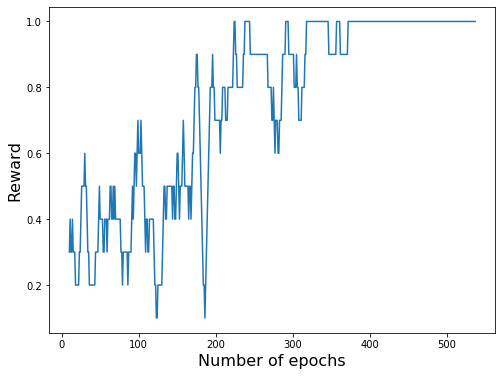

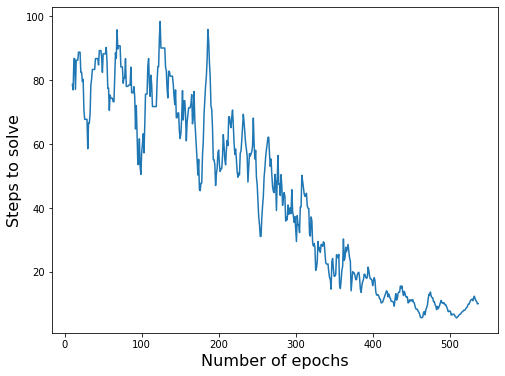

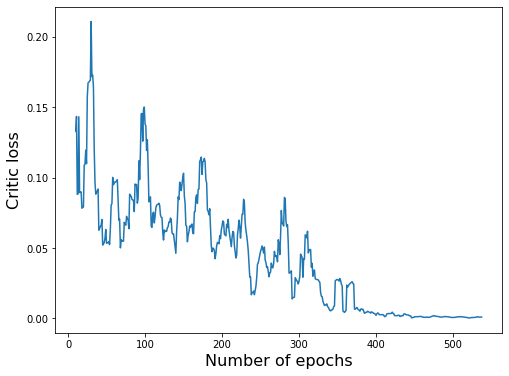

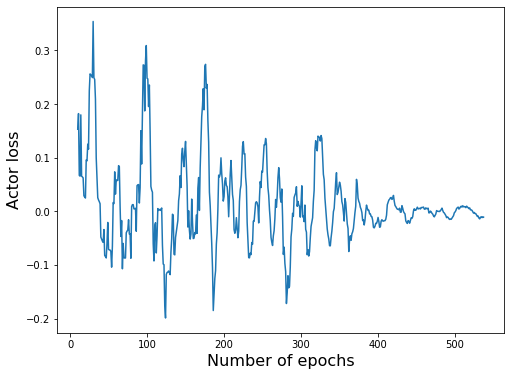

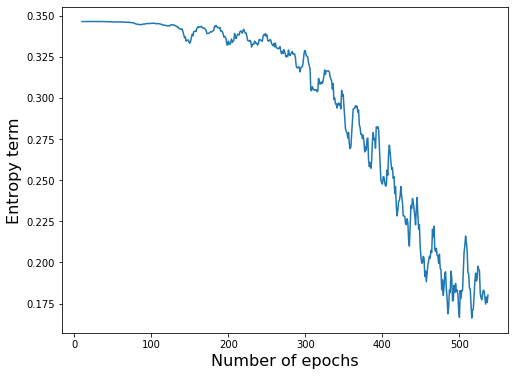

In [6]:
moving_average=True
average_window=10

if moving_average:
    n_epochs = np.arange(average_window, len(score))
else:
    n_epochs = np.arange(len(score))

### plot score ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(score[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, score)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.show()

### steps to solve ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(steps_to_solve[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, steps_to_solve)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Steps to solve", fontsize=16)
plt.show()

### plot critic loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['critic_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['critic_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Critic loss", fontsize=16)
plt.show()

### plot actor loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['actor_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['actor_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Actor loss", fontsize=16)
plt.show()

### plot entropy ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['entropies'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, -average_score)
else:
    plt.plot(n_epochs, -np.array(losses['entropies']))

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Entropy term", fontsize=16)
plt.show()

# Gated transformer architecture